<a href="https://colab.research.google.com/github/sheilaodor26/Advertising-Analysis/blob/main/Assignment_2_Feature_Engineering_Sheila_Odor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import chardet



In [2]:
with open('Heart_Disease_Data1.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
# Loading the dataset
Heart_Disease_Data1 = pd.read_csv('Heart_Disease_Data1.csv', encoding=result['encoding'])
Heart_Disease_Data1.head(10)

,id,dataset,Name,age,Region,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,Cleveland,Dorothy Dickinson,48,North,1,0,130.0,256.0,1,0,150.0,1,0.0,2,2,3,0
1,2,Cleveland,Arthur Prichep,61,North,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
2,3,Cleveland,Grant Thornton,44,Central,0,2,118.0,242.0,0,1,NaN,0,0.3,1,1,2,1
3,4,Cleveland,Michael Granlund,47,North,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
4,5,Cleveland,Dave Poirier,56,Central,1,3,120.0,193.0,0,0,162.0,0,1.9,1,0,3,1
5,6,Cleveland,Darren Powers,68,Central,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
6,7,Cleveland,Eric Murdock,63,Central,1,0,130.0,254.0,0,0,147.0,0,1.4,1,1,3,0
7,8,Cleveland,Mick Brown,35,South,1,0,126.0,282.0,0,0,156.0,1,0.0,2,0,3,0
8,9,Cleveland,Dorothy Dickinson,66,Central,1,0,NaN,302.0,0,0,151.0,0,0.4,1,0,2,1
9,10,Cleveland,Roy Collins,63,South,0,0,108.0,269.0,0,1,169.0,1,1.8,1,2,2,0


In [4]:
# Generate descriptive statistics for the Heart_Disease_Data1 DataFrame

Heart_Disease_Data1.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.00000,606.000000,606.000000,606.000000,561.000000,563.000000,606.000000,606.000000,590.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,303.50000,54.366337,0.683168,0.966997,131.634581,245.980462,0.148515,0.528053,149.610169,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,175.08141,9.074592,0.465626,1.031199,17.415515,51.698255,0.355903,0.525425,22.950391,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,1.00000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152.25000,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,303.50000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,454.75000,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,606.00000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Remove irrelevant columns
Heart_Disease_Data1.drop(['id','dataset', 'Name', 'Region'], axis = 1, inplace=True)

In [6]:
#viewing the new data head
Heart_Disease_Data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130.0,256.0,1,0,150.0,1,0.0,2,2,3,0
1,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
2,44,0,2,118.0,242.0,0,1,NaN,0,0.3,1,1,2,1
3,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
4,56,1,3,120.0,193.0,0,0,162.0,0,1.9,1,0,3,1


In [7]:
# Handling missing values
Heart_Disease_Data1.isnull().sum()

age          0
sex          0
cp           0
trestbps    45
chol        43
fbs          0
restecg      0
thalach     16
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [8]:
#Using the average to fill the null cells
Heart_Disease_Data1['trestbps'].fillna(value = 131.634581, inplace = True)

In [9]:
#Using the average to fill the null cells
Heart_Disease_Data1['chol'].fillna(value = 245.980462	, inplace = True)

In [10]:
#Using the average to fill the null cells
Heart_Disease_Data1['thalach'].fillna(value = 149.610169	, inplace = True)

In [11]:
# To check if the age column still has null cells
Heart_Disease_Data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#viewing the new data head
Heart_Disease_Data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130.0,256.0,1,0,150.000000,1,0.0,2,2,3,0
1,61,1,0,148.0,203.0,0,1,161.000000,0,0.0,2,1,3,0
2,44,0,2,118.0,242.0,0,1,149.610169,0,0.3,1,1,2,1
3,47,1,0,110.0,275.0,0,0,118.000000,1,1.0,1,1,2,0
4,56,1,3,120.0,193.0,0,0,162.000000,0,1.9,1,0,3,1


In [13]:
# Create new columns by Calculating BMI
Heart_Disease_Data1['bmi'] = Heart_Disease_Data1['chol'] / (Heart_Disease_Data1['age'] ** 2)

In [14]:
#viewing the new data head
Heart_Disease_Data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bmi
0,48,1,0,130.0,256.0,1,0,150.000000,1,0.0,2,2,3,0,0.111111
1,61,1,0,148.0,203.0,0,1,161.000000,0,0.0,2,1,3,0,0.054555
2,44,0,2,118.0,242.0,0,1,149.610169,0,0.3,1,1,2,1,0.125000
3,47,1,0,110.0,275.0,0,0,118.000000,1,1.0,1,1,2,0,0.124491
4,56,1,3,120.0,193.0,0,0,162.000000,0,1.9,1,0,3,1,0.061543


In [15]:
# Import train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [16]:
#Define labels and y variables (preparing data for modeling)
import numpy as np
labels = Heart_Disease_Data1['target']
features = Heart_Disease_Data1.drop('target',axis=1)


In [17]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [18]:
#Scale the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [19]:
#Script for Logistical Regression, Random Forest and Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
#Train Logistic Regression models using GridSearchCV
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=logistic_params, cv=5)
logistic_grid.fit(X_train2, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [22]:
print("Best Logistic Regression Model:", logistic_grid.best_estimator_)
print("Accuracy of Best Logistic Regression Model:", logistic_grid.best_score_)

Best Logistic Regression Model: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')
Accuracy of Best Logistic Regression Model: 0.845103092783505


In [24]:
#Train Random Forest models using GridSearchCV
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion':['gini', 'entropy', 'log_loss']
    }

random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=random_forest_params, cv=5)
random_forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
print("Best Random Forest Model:", random_forest_grid.best_estimator_)
print("Accuracy of Best Random Forest Model:", random_forest_grid.best_score_)

Best Random Forest Model: RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300)
Accuracy of Best Random Forest Model: 0.9421821305841924


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Plot confusion matrix for Logistic Regression and Random Forest models
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


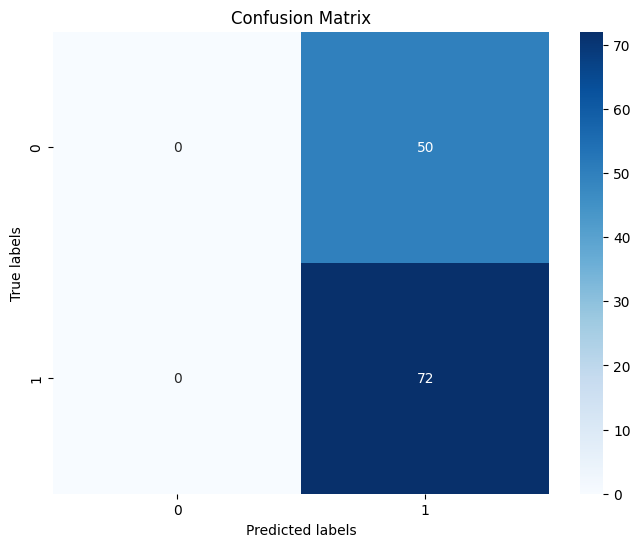

In [28]:
# Plot confusion matrix for best Logistic Regression model
plot_confusion_matrix(logistic_grid.best_estimator_, X_test, y_test)


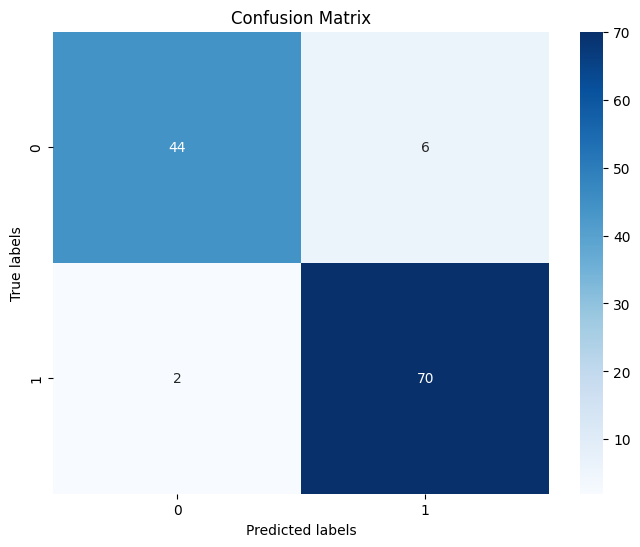

In [29]:
# Plot confusion matrix for best Random Forest model
plot_confusion_matrix(random_forest_grid.best_estimator_, X_test, y_test)